### Goldsmiths University of London
### Author....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 08/02/2023
### FYP.......: NeuroCredit

## I. Import Libraries and Packages

In [4]:
# Importing the pandas library to read the data
import pandas as pd

# Importing the numpy library to perform numerical operations
import numpy as np

# Importing the matplotlib library to plot the data
import matplotlib.pyplot as plt

# Importing module to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Importing the Logistic Regression module
from sklearn.linear_model import LogisticRegression

#Importing the metrics module to calculate the accuracy score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importing OneHotEncoder and LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Importing the metrics module to calculate the confusion matrix
from sklearn.metrics import confusion_matrix

# Importing the metrics module to calculate the roc_auc_score
from sklearn.metrics import roc_curve, auc

# Importing the metrics module to calculate the precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Importing the learning_curve module
from sklearn.model_selection import learning_curve

# Importing the validation_curve module
from sklearn.model_selection import validation_curve


## II. Data Inspection and Visualisation

### a. Loading the Dataset

In [5]:
# Reading the data with credit loans data
data = pd.read_csv('data.csv')

### b. Inspecting the Data Structure

In [6]:
# Printing the first 5 rows of the data
data.head().T

,0,1,2,3,4
credit_history,Poor,Poor,Excellent,Fair,Good
employment_status,Self-Employed,Unemployed,Unemployed,Unemployed,Unemployed
collateral,None,Investment,House,Car,House
payment_history,Fair,Excellent,Poor,Good,Excellent
type_of_credit_accounts,Auto,Mortgage,Other,Other,Personal
public_records_and_collections,Judgement,Collection,Bankruptcy,Tax Lien,None
purpose_of_loan,Debt Consolidation,Home Improvement,Debt Consolidation,Home Improvement,Business
income,30971,19120,48687,40997,35485
assets_value,11969,45396,18880,11527,27016
debt_to_income_ratio,78,81,73,6,33


In [7]:
# Print the first 5 rows of the data with the approval status approved
data[data['approval_status'] == 'Approved'].head().T

,12,14,15,17,25
credit_history,Good,Good,Good,Good,Good
employment_status,Employed,Self-Employed,Employed,Self-Employed,Employed
collateral,Other,Investment,Car,House,House
payment_history,Excellent,Poor,Excellent,Good,Good
type_of_credit_accounts,Mortgage,Student,Personal,Student,Other
public_records_and_collections,Other,Tax Lien,Collection,Judgement,Judgement
purpose_of_loan,Other,Business,Debt Consolidation,Car Financing,Other
income,34017,44278,42227,24331,44707
assets_value,18704,42937,21854,26163,35464
debt_to_income_ratio,73,46,8,74,74


In [8]:
# Display concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   credit_history                                   1000 non-null   object
 1   employment_status                                1000 non-null   object
 2   collateral                                       1000 non-null   object
 3   payment_history                                  1000 non-null   object
 4   type_of_credit_accounts                          1000 non-null   object
 5   public_records_and_collections                   1000 non-null   object
 6   purpose_of_loan                                  1000 non-null   object
 7   income                                           1000 non-null   int64 
 8   assets_value                                     1000 non-null   int64 
 9   debt_to_income_ratio                      

### c. Convert the integer values to float values

In [21]:
# Get the list of columns with int64 data type
int_columns = data.select_dtypes(include=['int64']).columns

# Convert the int64 columns to float64 columns
data[int_columns] = data[int_columns].astype('float64')

# Display concise summary of a DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   credit_history                                   1000 non-null   object 
 1   employment_status                                1000 non-null   object 
 2   collateral                                       1000 non-null   object 
 3   payment_history                                  1000 non-null   object 
 4   type_of_credit_accounts                          1000 non-null   object 
 5   public_records_and_collections                   1000 non-null   object 
 6   purpose_of_loan                                  1000 non-null   object 
 7   income                                           1000 non-null   float64
 8   assets_value                                     1000 non-null   float64
 9   debt_to_income_ratio           

In [9]:
# Describing the dataset with the mean, standard deviation, min, max, etc.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000.0,30293.971,11794.595661,10011.0,19645.50,31284.5,40495.00,50000.0
assets_value,1000.0,29455.145,11650.725108,10082.0,19203.50,29423.0,39650.75,49980.0
debt_to_income_ratio,1000.0,49.861,29.018473,0.0,24.00,50.0,74.00,100.0
length_of_credit_history,1000.0,48.698,29.169396,0.0,23.00,48.0,74.00,100.0
number_of_credit_inquiries,1000.0,2.470,1.698819,0.0,1.00,2.0,4.00,5.0
number_of_credit_accounts,1000.0,2.473,1.676927,0.0,1.00,2.0,4.00,5.0
number_of_credit_accounts_opened_last_12_months,1000.0,2.429,1.716364,0.0,1.00,2.0,4.00,5.0
current_balance_of_credit_accounts,1000.0,9988.698,5687.742867,10.0,5143.25,10202.0,14744.00,19993.0
total_credit_limit,1000.0,9917.376,5762.510963,15.0,4919.75,9640.5,14723.75,19997.0
total_credit_utilization,1000.0,48.910,28.504463,0.0,24.00,48.0,72.00,100.0


### c. Visualising the Dataset

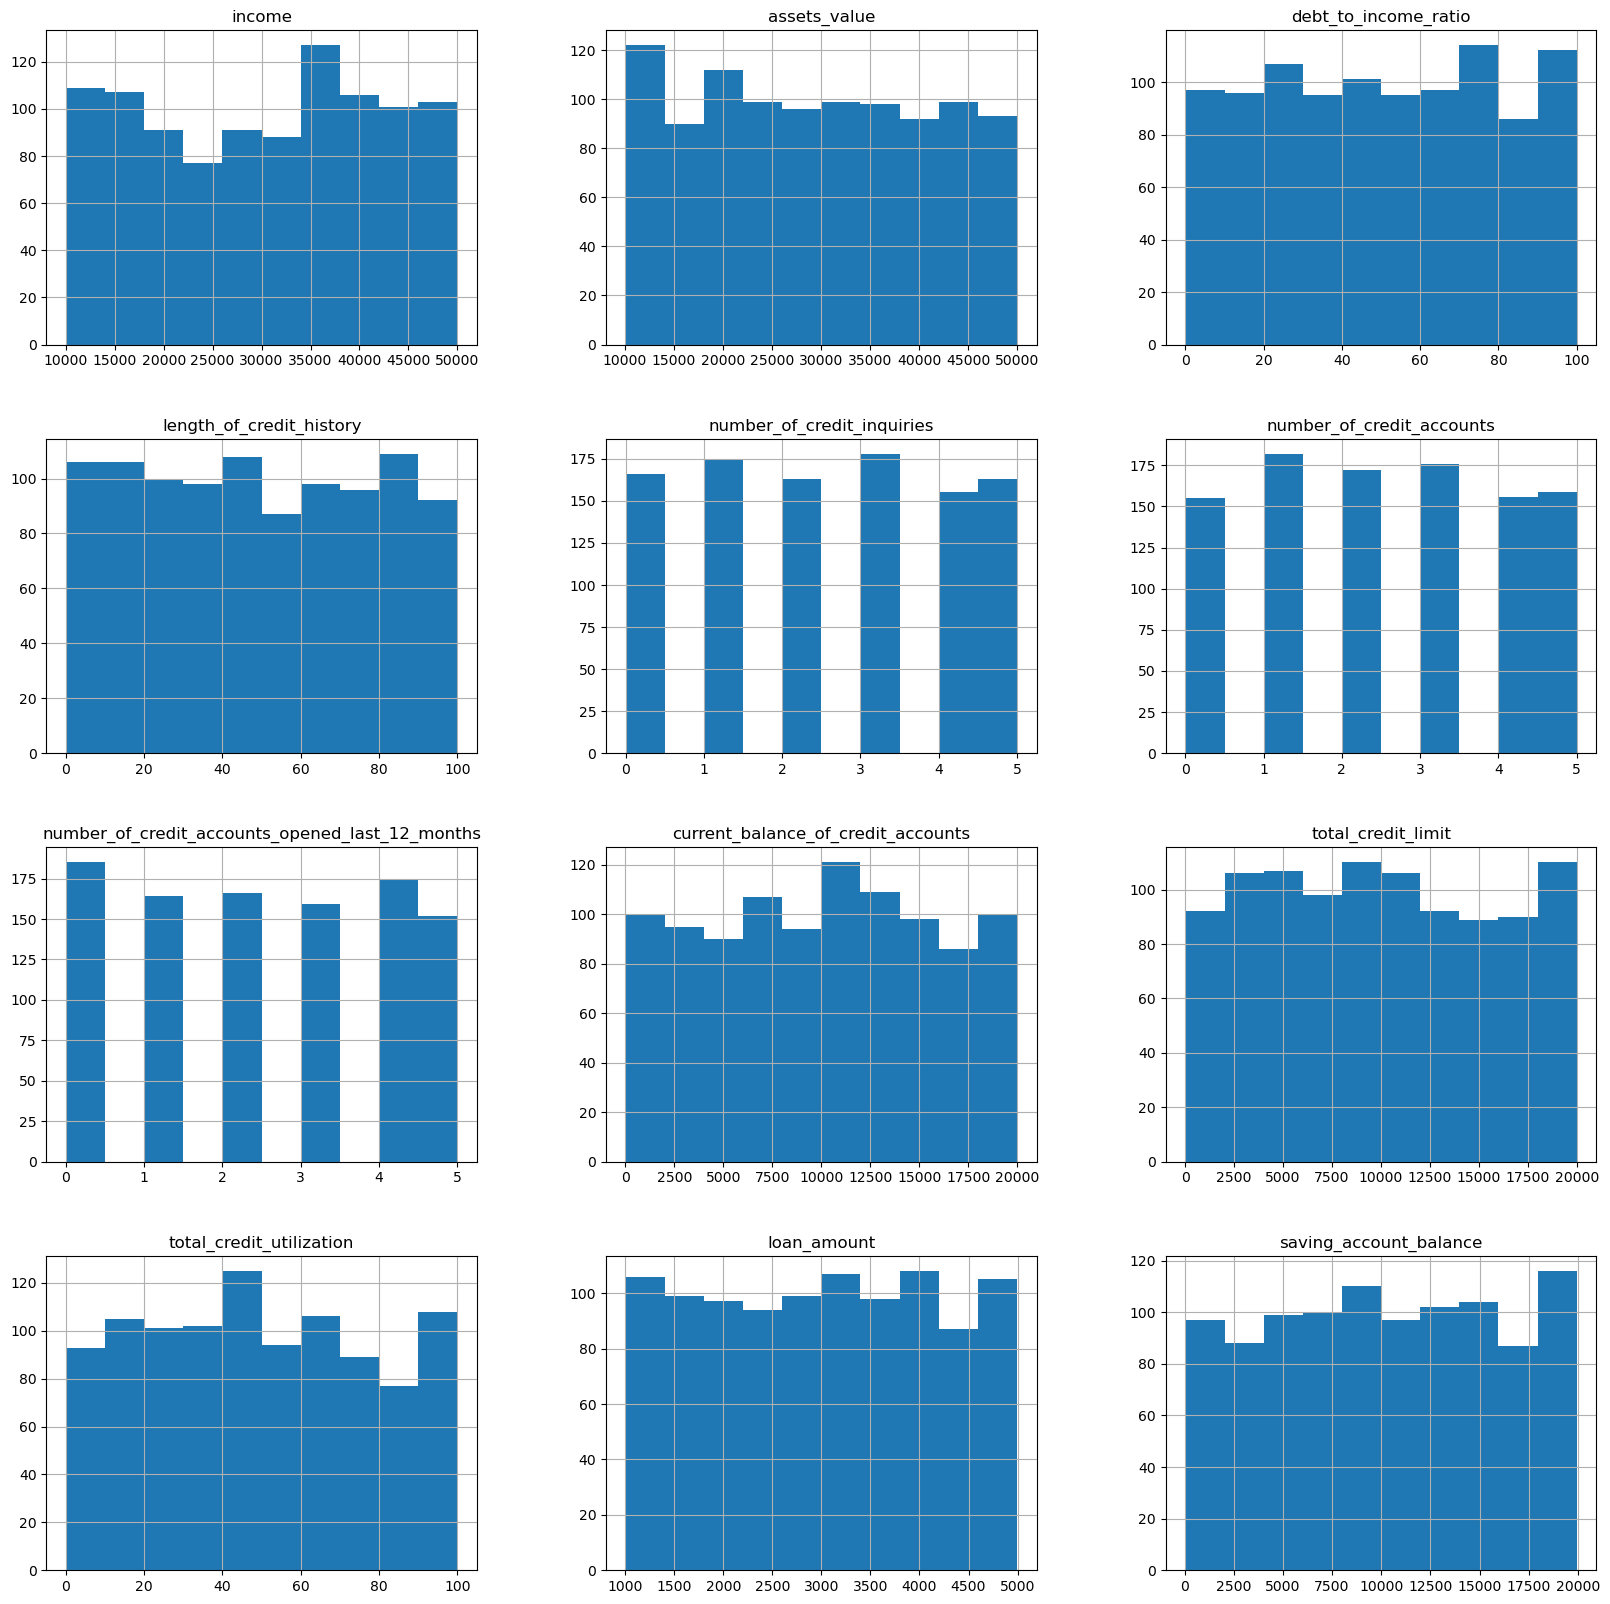

In [22]:
# Plotting the histogram of the data
data.hist(figsize=(20,20))
plt.show()

## III. Data Pre-Processing

### a. Check for Missing Values on the dataset

In [23]:
# Print the missing values in the dataset
data.isnull().sum()

credit_history                                     0
employment_status                                  0
collateral                                         0
payment_history                                    0
type_of_credit_accounts                            0
public_records_and_collections                     0
purpose_of_loan                                    0
income                                             0
assets_value                                       0
debt_to_income_ratio                               0
length_of_credit_history                           0
number_of_credit_inquiries                         0
number_of_credit_accounts                          0
number_of_credit_accounts_opened_last_12_months    0
current_balance_of_credit_accounts                 0
total_credit_limit                                 0
total_credit_utilization                           0
loan_amount                                        0
saving_account_balance                        

### b. Looking for Correlations

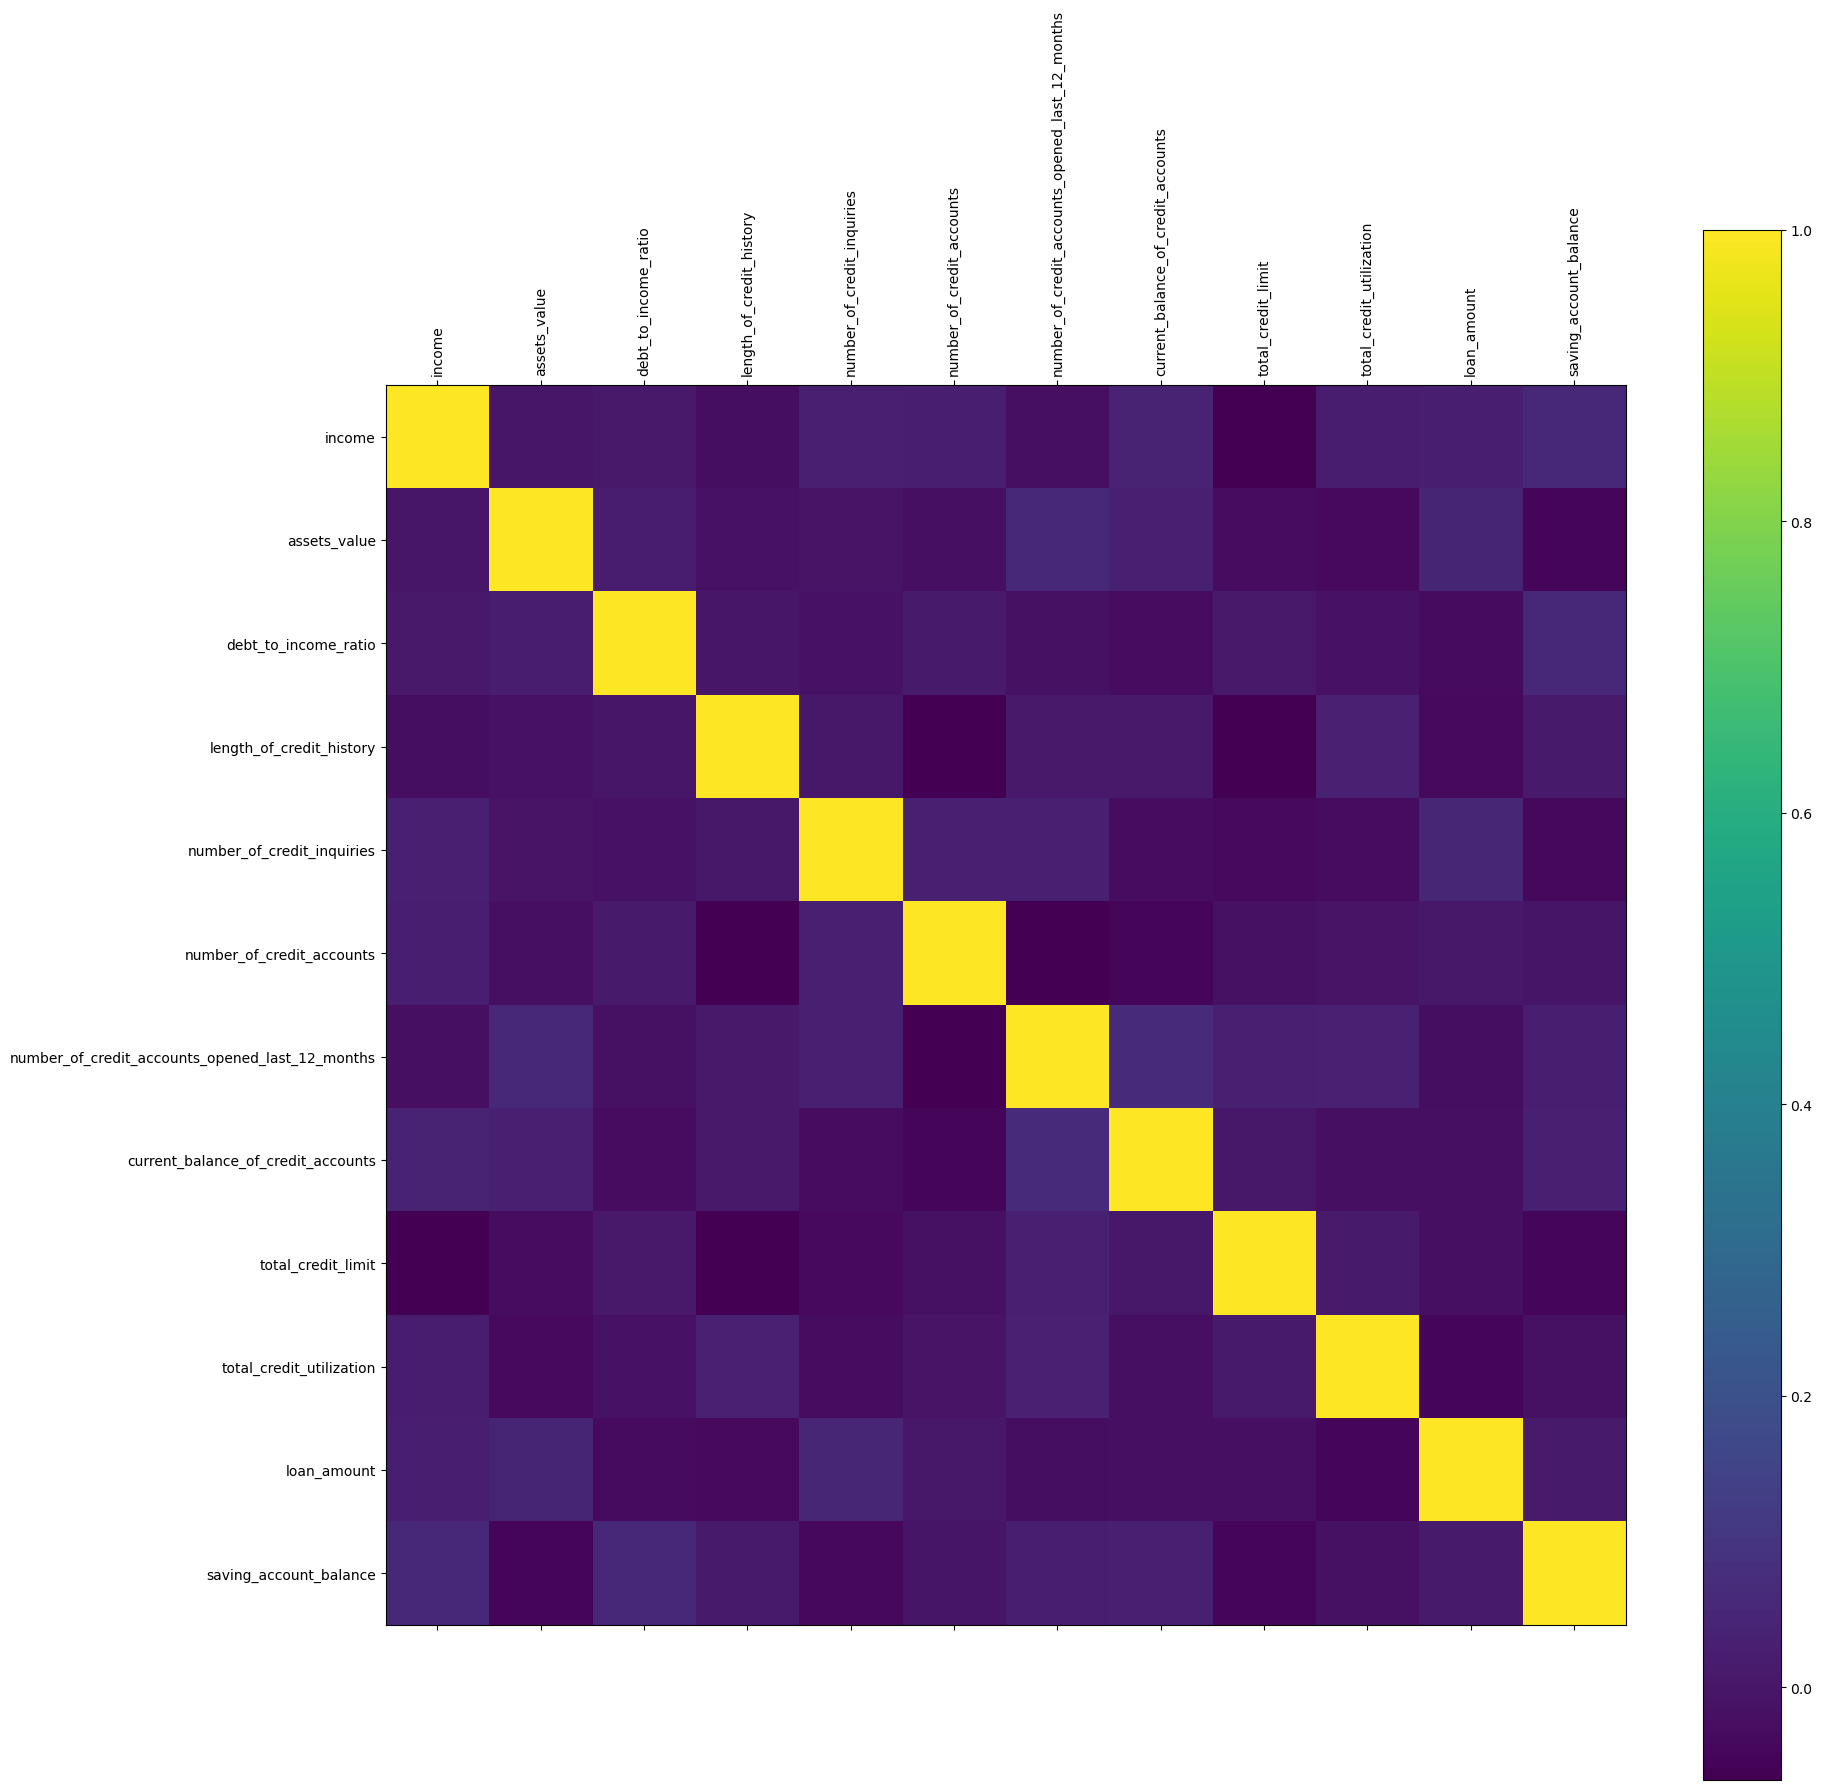

In [24]:
# Create a correlation matrix of the dataset
corr = data.corr()

# Plot the correlation matrix of the dataset
plt.figure(figsize=(20,20))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()


In [26]:
# Print the correlation matrix of the dataset
corr['income'].sort_values(ascending=False)


income                                             1.000000
saving_account_balance                             0.052822
current_balance_of_credit_accounts                 0.039865
number_of_credit_inquiries                         0.031115
loan_amount                                        0.027725
number_of_credit_accounts                          0.024246
total_credit_utilization                           0.017240
debt_to_income_ratio                               0.007325
assets_value                                       0.002884
number_of_credit_accounts_opened_last_12_months   -0.021862
length_of_credit_history                          -0.024252
total_credit_limit                                -0.063507
Name: income, dtype: float64

In [10]:
# Split the data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
# Print the number of rows and columns in the train and test sets
print('Train set: ', train.shape)
print('Test set: ', test.shape)

Train set:  (800, 20)
Test set:  (200, 20)


In [12]:
# Create Logistic Regression model
logistic_regression = LogisticRegression()

# One-hot encode the string values in the train and test datasets
encoder = OneHotEncoder(handle_unknown='ignore')
X_train = encoder.fit_transform(train.drop(columns=['approval_status']))
X_test = encoder.transform(test.drop(columns=['approval_status']))

# Create y_train with the target column from the training set
y_train = train['approval_status']

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the y_train labels using the LabelEncoder
y_train = encoder.fit_transform(y_train)

# Train the model on the training set
logistic_regression.fit(X_train, y_train)

# Make predictions for the test set
predictions = logistic_regression.predict(X_test)

# Create y_test with the target column from the test set
y_test = test['approval_status']

# Transform the y_test labels using the LabelEncoder (without re-fitting)
y_test = encoder.transform(y_test)

# Print the first 5 predictions
print("First 5 Predictions:")
for i, prediction in enumerate(predictions[:5]):
    print(f"{prediction} - The model predicts that the {i + 1} example belongs to class {prediction}.")

# Print the first 5 probabilities of the predictions
probabilities = logistic_regression.predict_proba(X_test)[:5]
print("\nFirst 5 Probabilities:")
for i, probability in enumerate(probabilities):
    class_0_prob = probability[0]
    class_1_prob = probability[1]
    class_0_prob_pct = round(class_0_prob * 100, 2)
    class_1_prob_pct = round(class_1_prob * 100, 2)
    print(f"[{class_0_prob:.2f}, {class_1_prob:.2f}] - {class_1_prob_pct:.2f}% probability of class 1, {class_0_prob_pct:.2f}% probability of class 0.")

# Evaluate the performance of the model
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the performance metrics
print('\nAccuracy...: {:.2f} %'.format(acc*100))
print('Precision..: {:.2f} %'.format(prec*100))
print('Recall.....: {:.2f} %'.format(rec*100))
print('F1 Score...: {:.2f} %'.format(f1*100))

First 5 Predictions:
1 - The model predicts that the 1 example belongs to class 1.
1 - The model predicts that the 2 example belongs to class 1.
1 - The model predicts that the 3 example belongs to class 1.
0 - The model predicts that the 4 example belongs to class 0.
1 - The model predicts that the 5 example belongs to class 1.

First 5 Probabilities:
[0.01, 0.99] - 98.85% probability of class 1, 1.15% probability of class 0.
[0.00, 1.00] - 99.81% probability of class 1, 0.19% probability of class 0.
[0.00, 1.00] - 99.51% probability of class 1, 0.49% probability of class 0.
[0.54, 0.46] - 45.92% probability of class 1, 54.08% probability of class 0.
[0.01, 0.99] - 99.36% probability of class 1, 0.64% probability of class 0.

Accuracy...: 87.50 %
Precision..: 90.61 %
Recall.....: 95.35 %
F1 Score...: 92.92 %


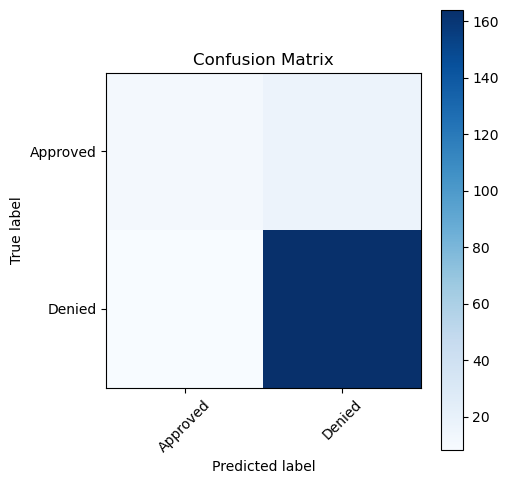

In [13]:
# Plot the confusion matrix for the model

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Approved', 'Denied'], rotation=45)
plt.yticks(tick_marks, ['Approved', 'Denied'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

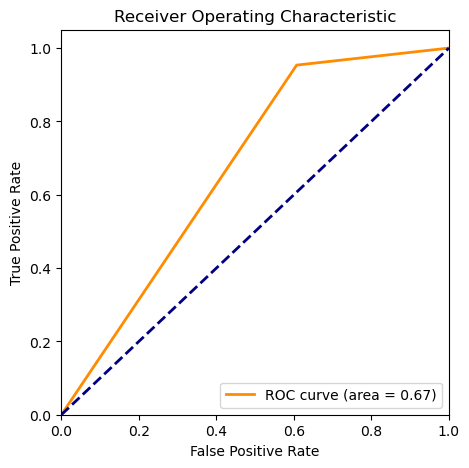

In [14]:
# Plot the ROC curve and compute the area under the curve

# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Compute the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

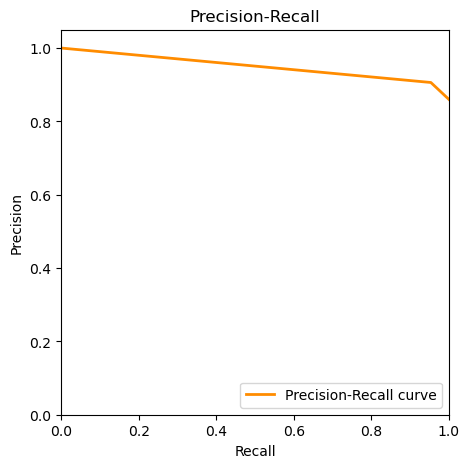

In [15]:
# Plot the precision-recall curve for the model

# Compute the precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# Plot the precision-recall curve
plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend(loc="lower right")
plt.show()

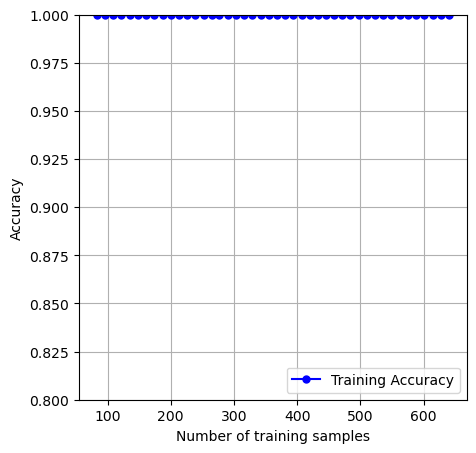

In [16]:
# Plot the learning curve for the training set

# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(logistic_regression, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)

# Compute the mean and standard deviation of the training and test scores
train_std = np.std(train_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(5, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

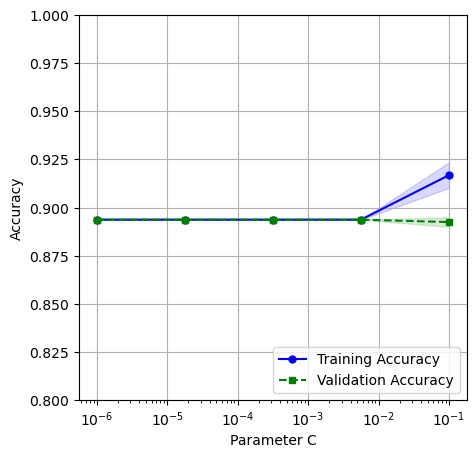

In [17]:
# Plot the validation curve 

# Create the validation curve
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(logistic_regression, X_train, y_train, param_name='C', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)

# Compute the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(5, 5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

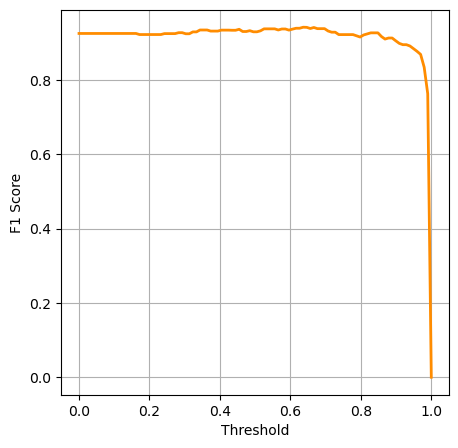

In [18]:
# Plot F1 score vs. threshold for the test set

# Compute the F1 score for each threshold
f1_scores = []
thresholds = np.linspace(0, 1, 100)
for threshold in thresholds:
    y_pred = (logistic_regression.predict_proba(X_test)[:, 1] >= threshold).astype(bool)
    f1_scores.append(f1_score(y_test, y_pred))

# Plot the F1 score vs. threshold
plt.figure(figsize=(5, 5))
plt.plot(thresholds, f1_scores, color='darkorange', lw=2)
plt.grid()
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

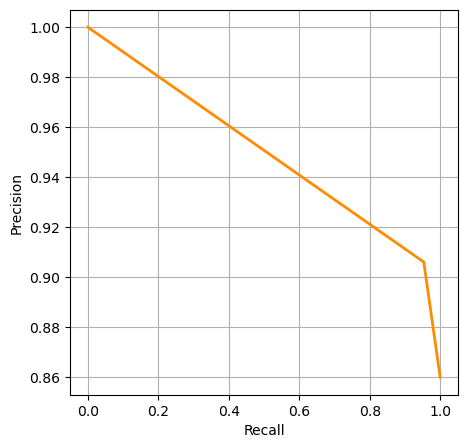

In [19]:
# Plot precision vs. recall curve

# Compute the precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# Plot the precision vs. recall
plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()